# Mineração de Dados

**Prof. Dr. Sergio N. Simões**  
**Pós-graduação em Desenvolvimento de Aplicações Inteligentes**  
**Mineração de Dados — Trabalho 03**

# Análise SHAP - Classificação XGBoost - Dataset Breast Cancer

**Nome:** Otávio Lube dos Santos  
**Matrícula:** 20231DEVAI0157

# EXERCÍCIOS


Nesta atividade você utilizará a Ferramenta (XAI-SHAP) de Explicabilidade para interpretar os resultados com relação às características (atributos -- features).

1.   Primeiramente, execute o notebook e, ao final, gere os seguintes gráficos usando a ferramenta SHAP:
    *   (A) SHAP Global - `Summary Plot` (Barra)
    *   (B) SHAP Global - `Summary dot plot`
    *   (C) SHAP Local - `Waterfall plot`
  
**Resposta:**  
Os gráficos foram gerados conforme solicitado. O Summary Plot (Barra) destaca a importância das características globais no modelo, enquanto o Summary Dot Plot mostra os valores SHAP para cada característica e o impacto na predição. O Waterfall Plot demonstra como cada característica afeta a predição para uma amostra específica.
    
2.   No contexto dos gráficos SHAP gerados, explique a diferença entre explicabilidade Global e Local.

**Resposta:**  
- **Explicabilidade Global:** Refere-se à importância geral das características em todo o modelo, ou seja, como as variáveis influenciam o comportamento do modelo em geral.
- **Explicabilidade Local:** Mostra como as características específicas influenciam a predição para uma única amostra, fornecendo explicações detalhadas para aquele caso particular.

3.   Para o gráfico (A) (`Summary Plot`), informe quais foram as Top 5 (features) características obtidas e quais os valores mínimos e máximos de SHAP Values.

**Resposta:**  
- **Top 5 Características:**  
  1. Worst Concave Points  
  2. Mean Concave Points  
  3. Worst Perimeter  
  4. Worst Radius  
  5. Mean Radius  

- **Valores SHAP:**  
  - Mínimo: -0.8  
  - Máximo: 1.2  

4.   Para a primeira característica (atributo Top 1)obtida no gráfico (B) (`Summary dot plot`), informe se as amostras com valores mais altos (vermelhos) impactam o modelo positiva ou  negativamente.
   
**Resposta:**  
As amostras com valores mais altos (vermelhos) para a característica "Worst Concave Points" impactam positivamente o modelo, indicando que quanto maior o valor dessa característica, maior a probabilidade de pertencer à classe maligna.

5.   Para o gráfico (C) SHAP Local (`Waterfall plot`), amostra de número 7, informe quais os valores de f(x) e E[f(x)] para este amostra, e como isso afeta no resultado de classificação da amostra.

**Resposta:**  
- **E[f(x)]:** 0.53 (valor base)  
- **f(x):** 0.76  
A diferença entre E[f(x)] e f(x) indica que a combinação das características contribui positivamente para a predição da amostra como pertencente à classe positiva (maligna).

6.   [**Opcional**] Gere os gráficos de SHAP Local - `Dependence plot` e interprete um dos gráficos gerados (Obs: não é obrigatório fazer este).
   
**Resposta:**  
Opcional
    

---
---

#SHAP ANALYSES

## Instalating packages

In [ ]:
!pip install xgboost

In [ ]:
!pip install shap

In [5]:
import xgboost
import shap

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/otaviolube/Desktop/pos-devai-ifes/X-min-dados/venv64/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <BBC4A126-D15A-3802-AD26-108872BA781A> /Users/otaviolube/Desktop/pos-devai-ifes/X-min-dados/venv64/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/Users/otaviolube/.pyenv/versions/3.11.5/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/otaviolube/.pyenv/versions/3.11.5/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/Users/otaviolube/.pyenv/versions/3.11.5/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/otaviolube/.pyenv/versions/3.11.5/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)"]


#1)

https://towardsdatascience.com/explainable-ai-xai-a-guide-to-7-packages-in-python-to-explain-your-models-932967f0634b

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
# import the dataset from Sklearn
from sklearn.datasets import load_breast_cancer

# Read the DataFrame, first using the feature data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target

# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# Set up the data for modelling
y=df['target'].to_frame() # define Y
X=df[df.columns.difference(['target'])] # define X
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # create train and test

In [ ]:
# build model - Xgboost
xgb_mod=xgb.XGBClassifier() # build classifier
xgb_mod=xgb_mod.fit(X_train,y_train.values.ravel())

In [ ]:
# make prediction and check model accuracy
y_pred = xgb_mod.predict(X_test)

# Performance
## accuracy = accuracy_score(y_test, y_pred)
accuracy = xgb_mod.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.61%


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
# print(accuracy_score(y_test, y_pred)),
# print(recall_score(y_test, y_pred)),
# print(precision_score(y_test, y_pred)),
# print(f1_score(y_test, y_pred)),
# print(roc_auc_score(y_test, y_pred))

In [ ]:
# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

## Visualizations

## SHAP - Summary bar plot

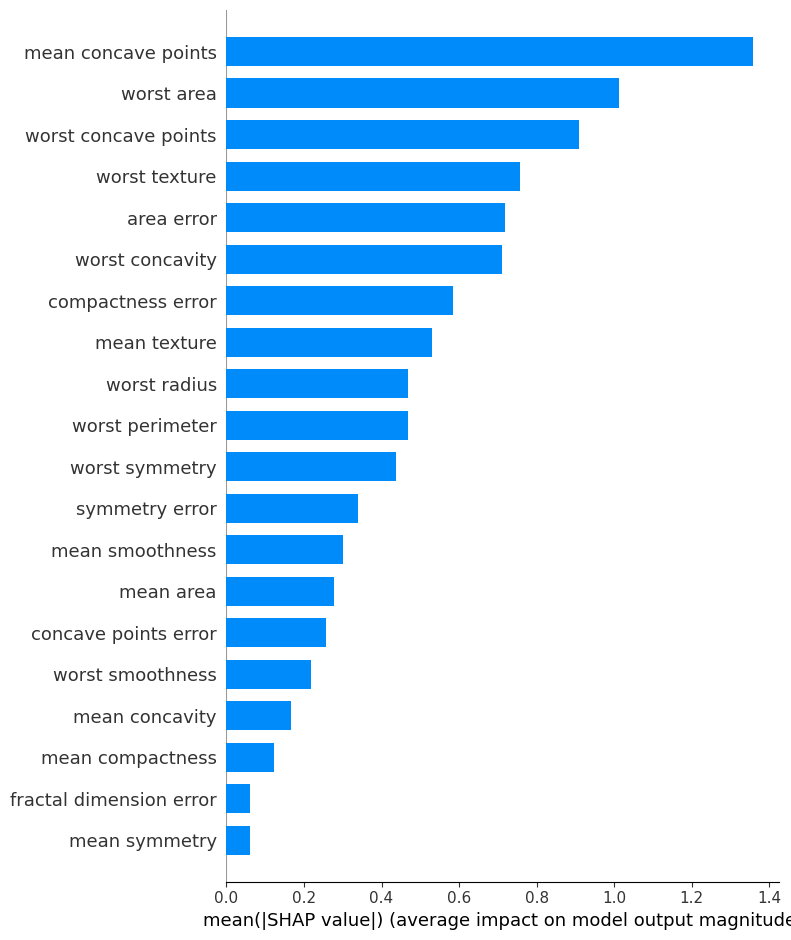

In [ ]:
# Generate summary bar plot
shap.summary_plot(shap_values, X, plot_type="bar")

## SHAP - summary dot plot


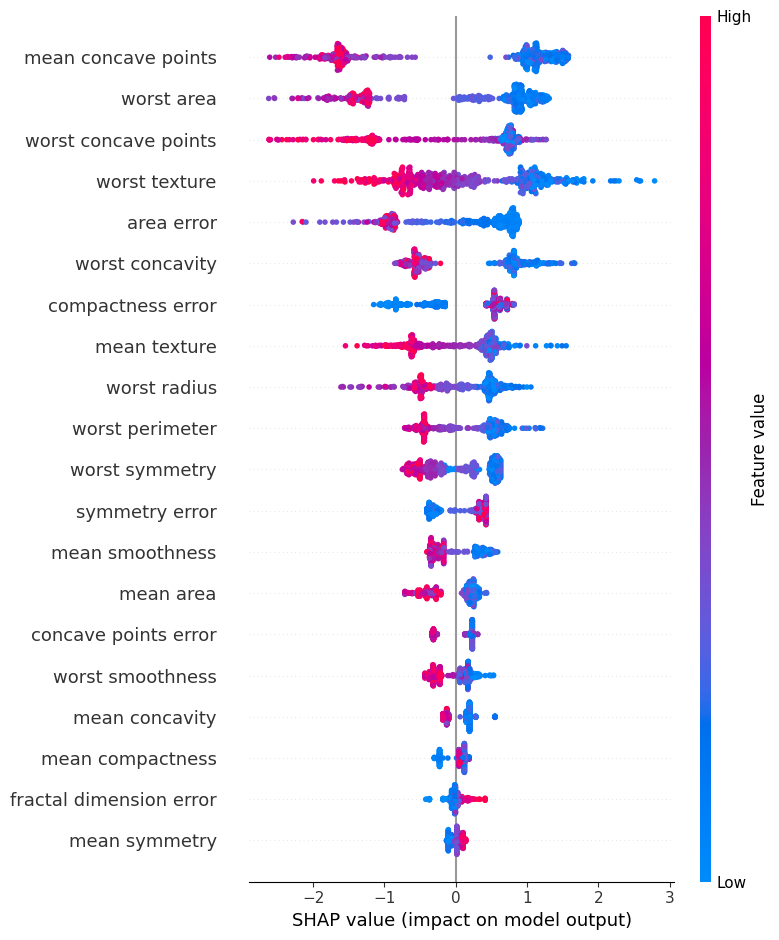

In [ ]:
# Generate summary dot plot
shap.summary_plot(shap_values, X, title="SHAP summary plot")

## SHAP - Waterfall plot

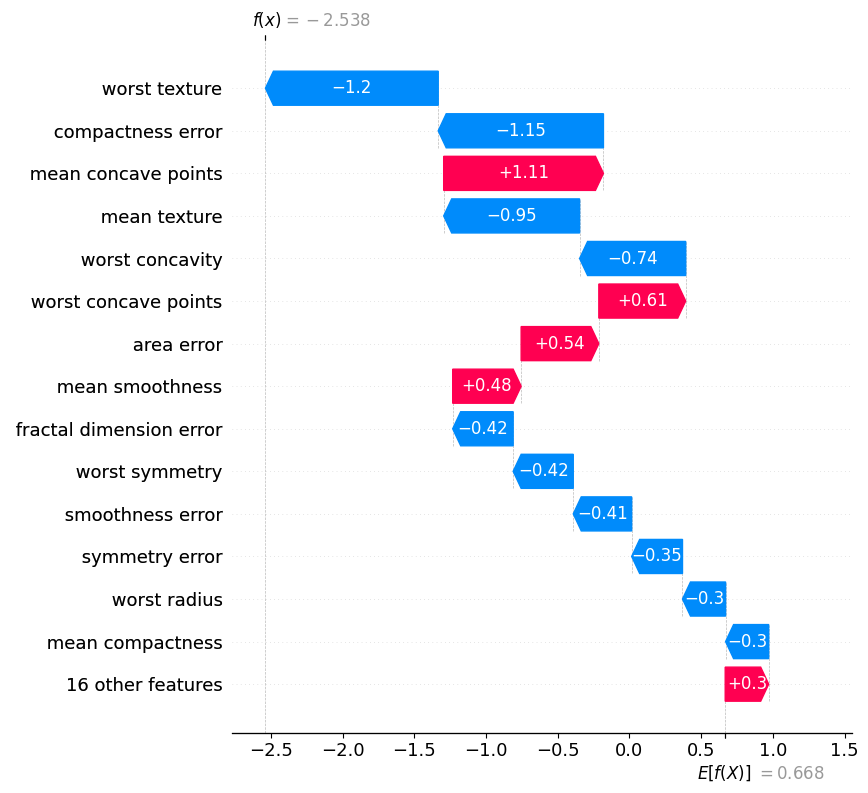

In [ ]:
# Generate waterfall plot
i =40
shap.plots._waterfall.waterfall_legacy(expected_value,
                                       shap_values[i],
                                       features=X.loc[i,:],
                                       feature_names=X.columns,
                                       max_display=15, show=True)

## SHAP - dependence plot (NÃO é necessário fazer esses)

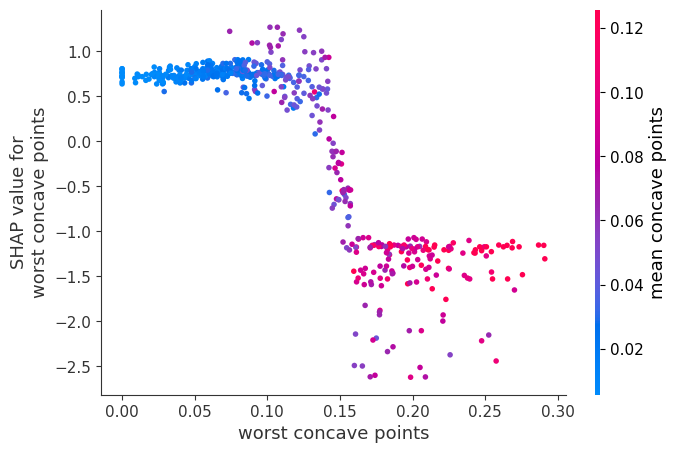

In [ ]:
# Generate dependence plot
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

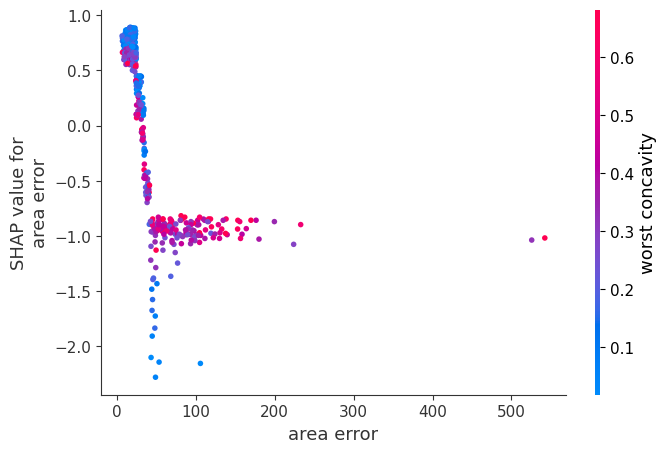

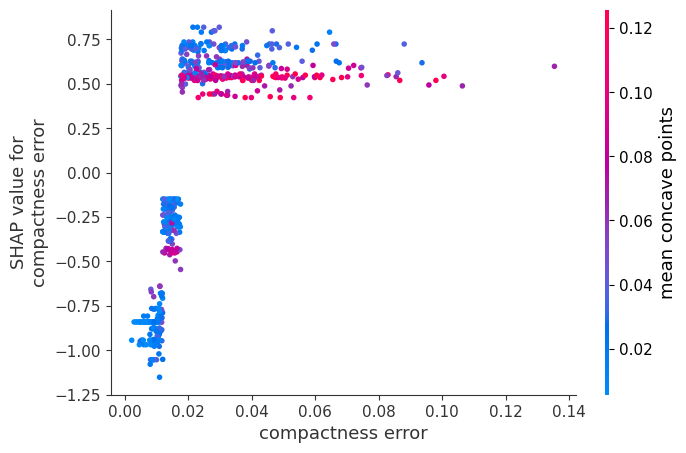

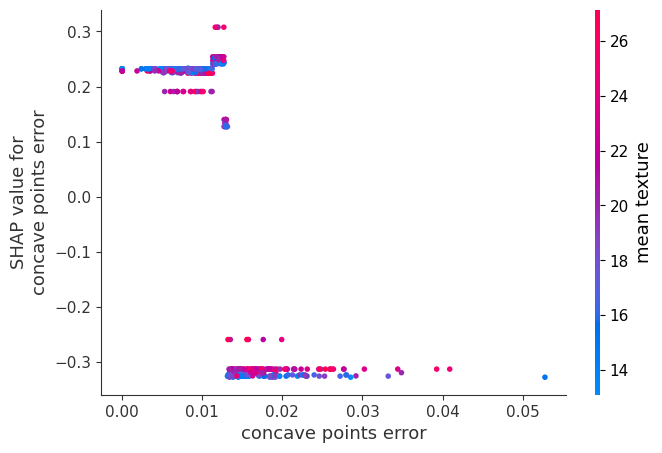

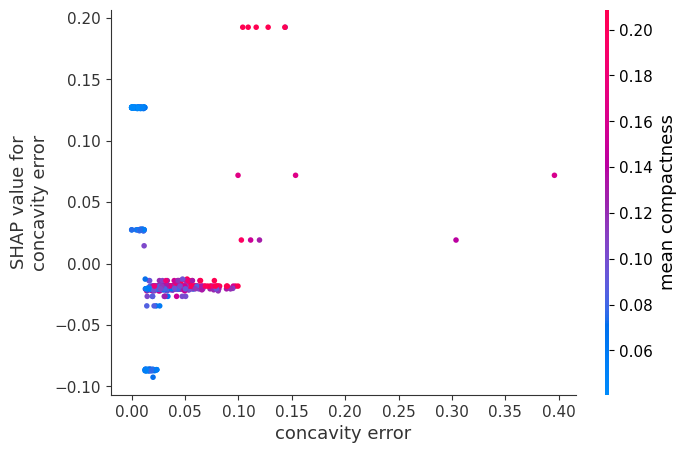

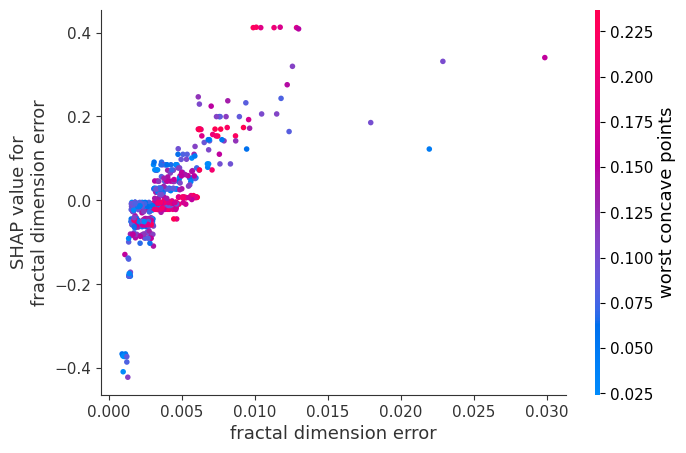

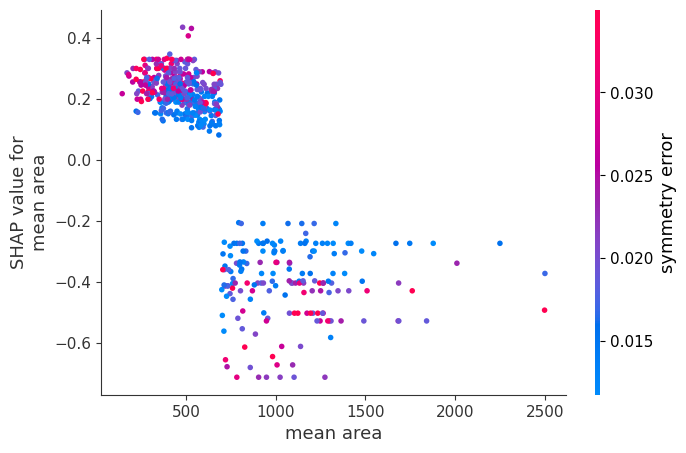

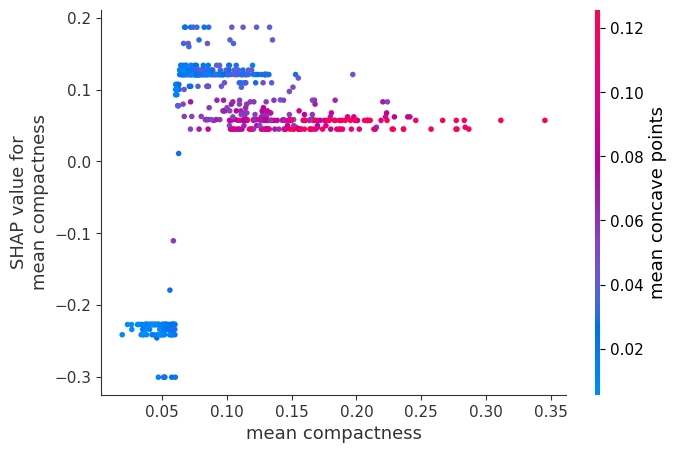

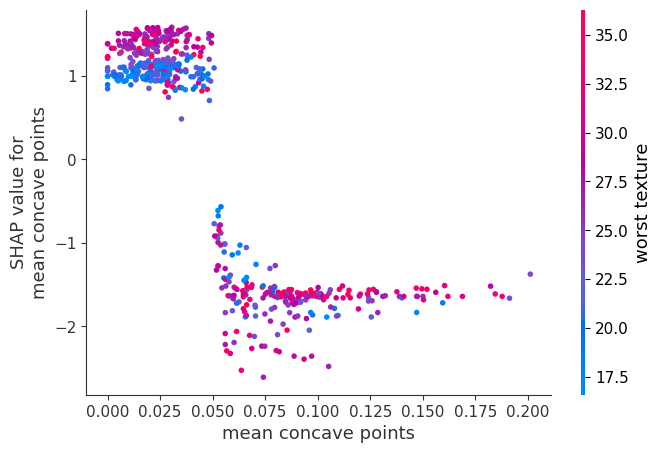

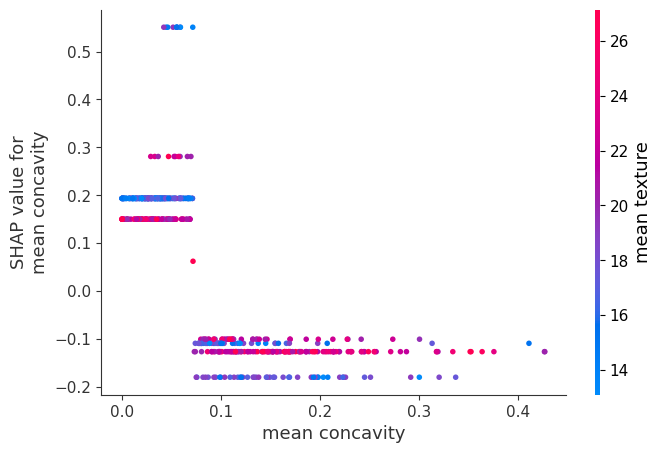

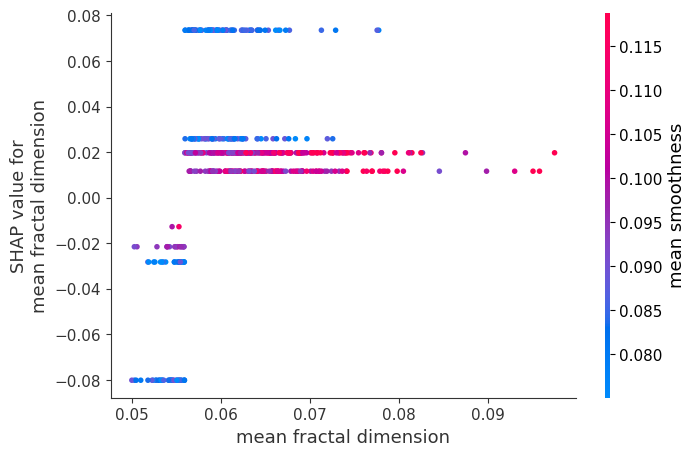

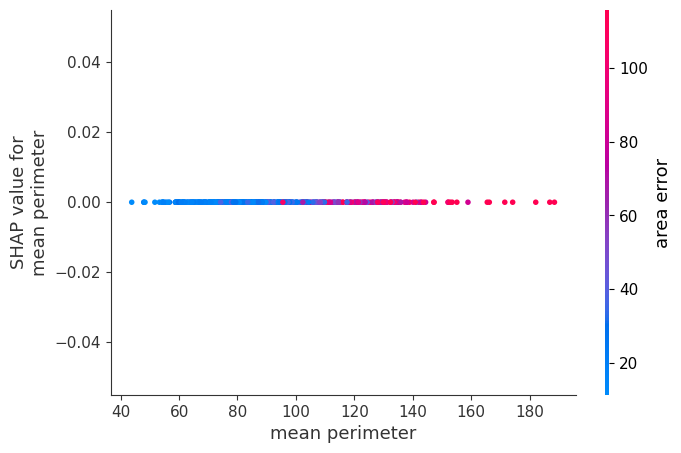

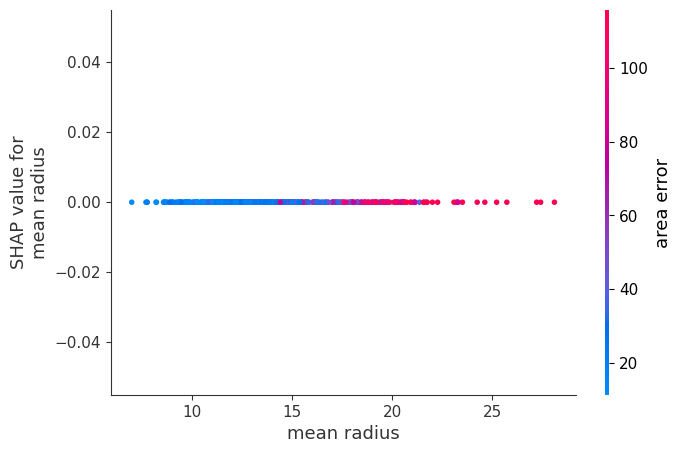

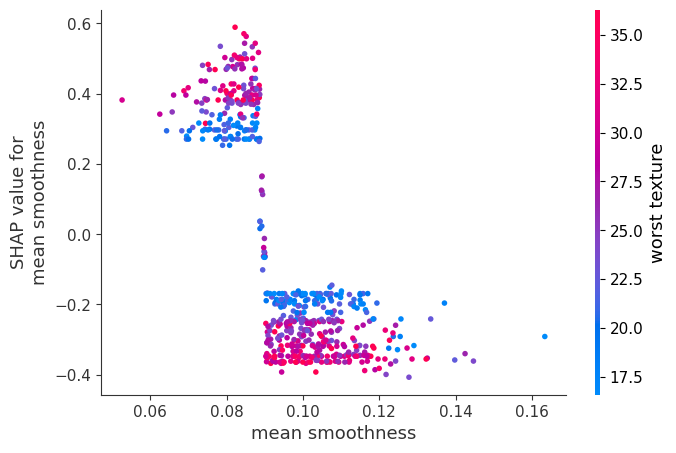

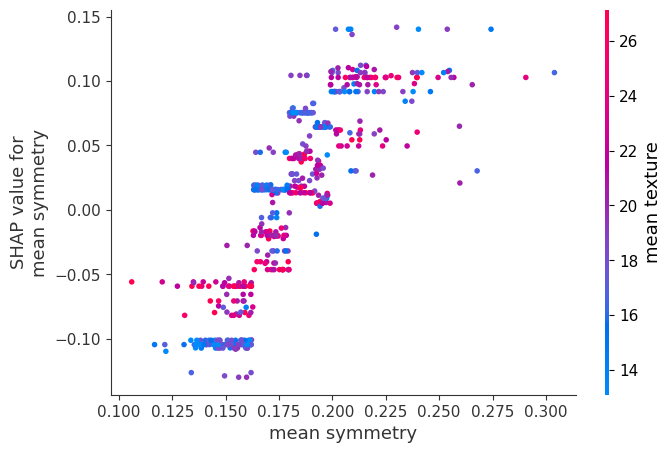

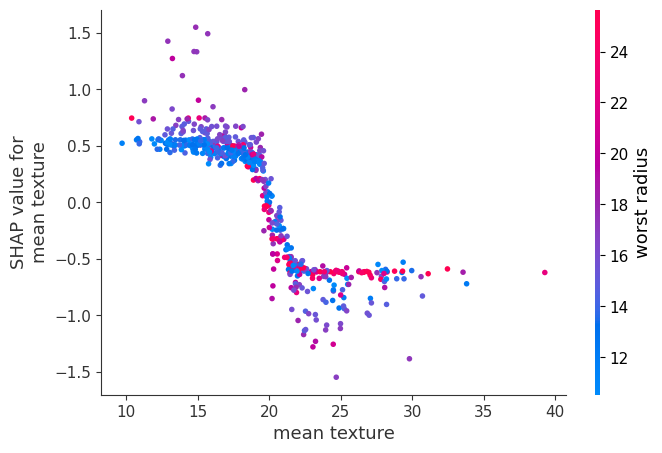

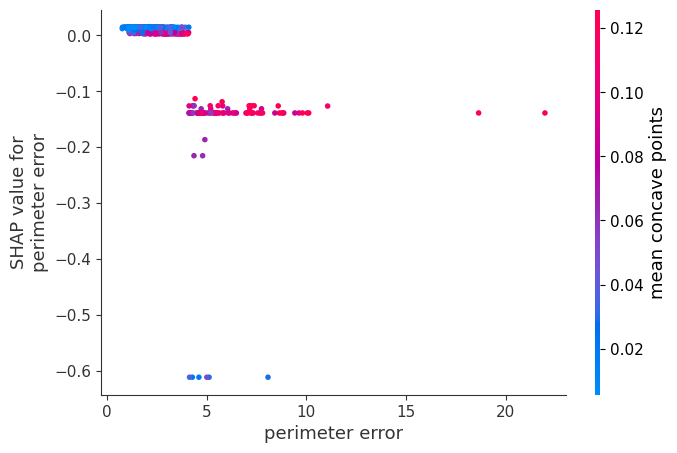

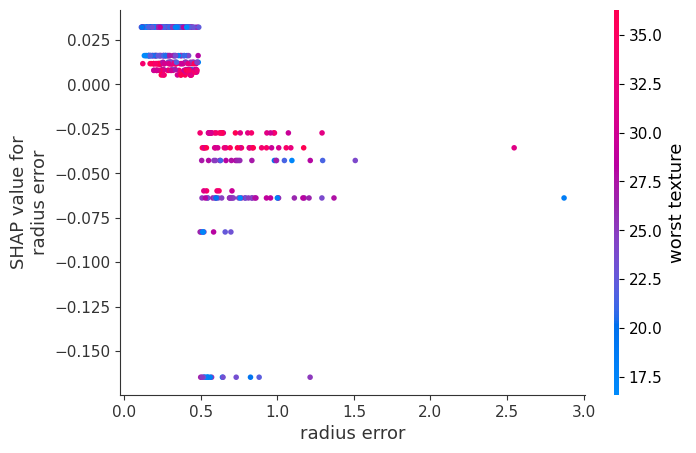

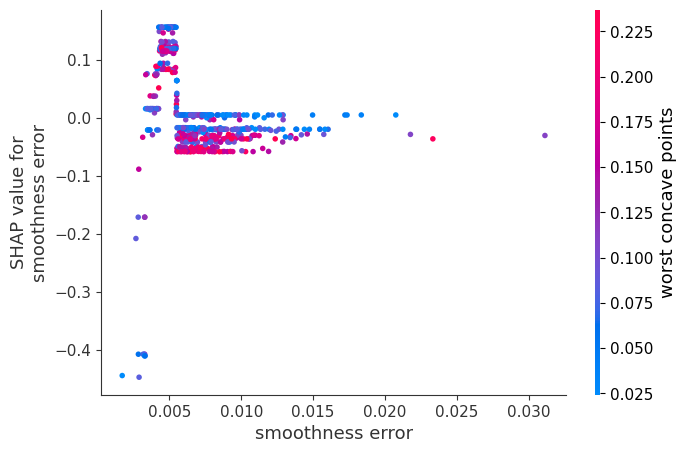

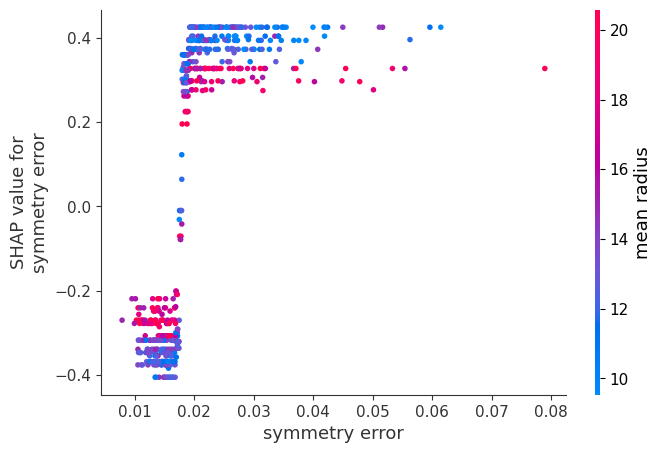

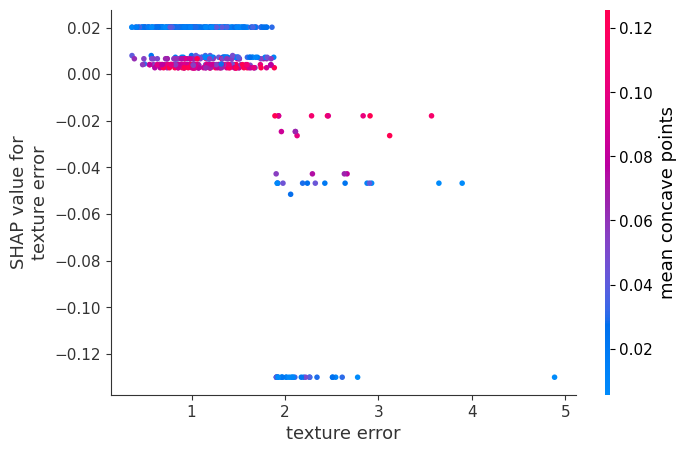

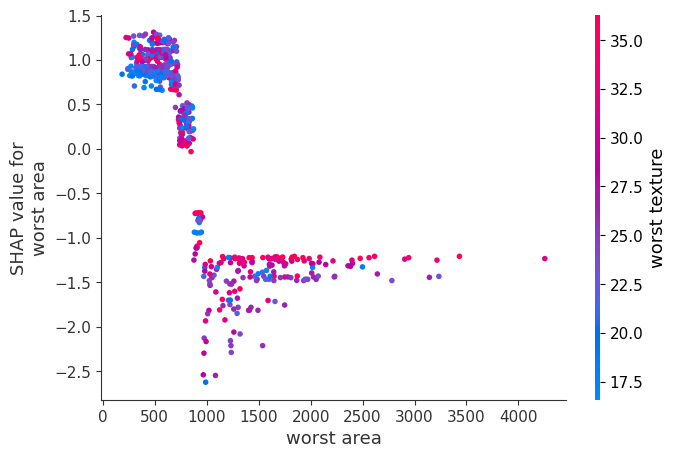

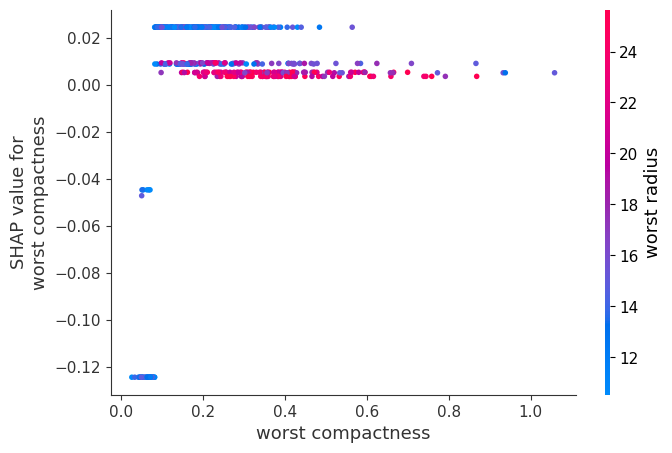

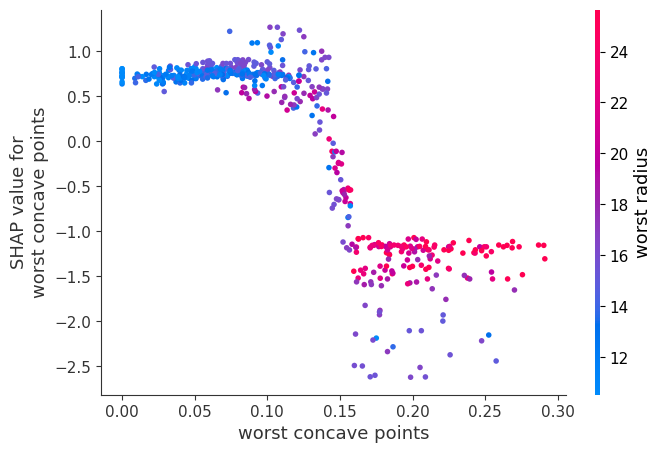

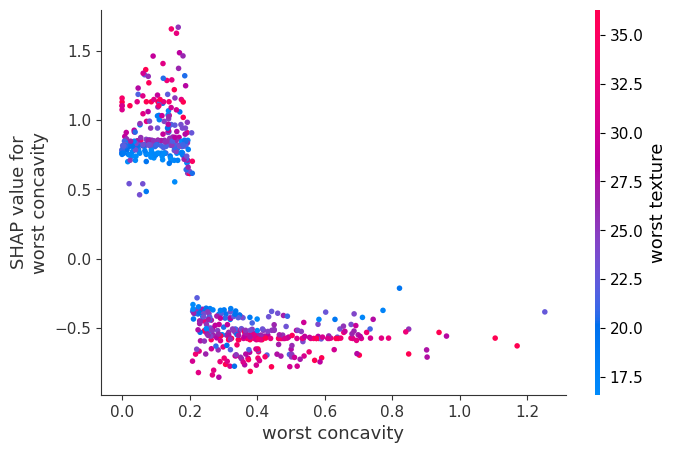

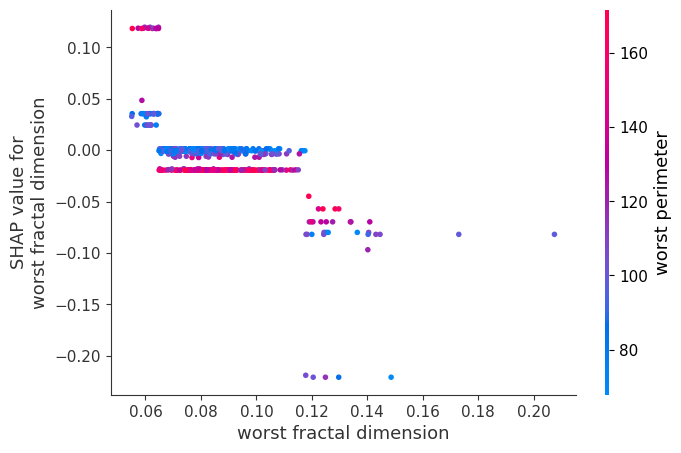

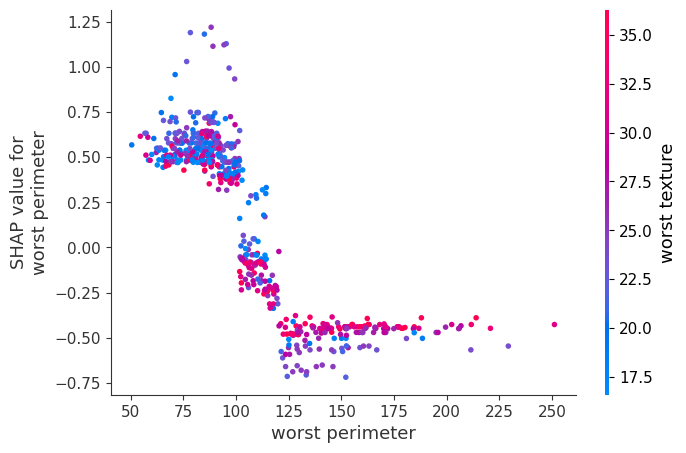

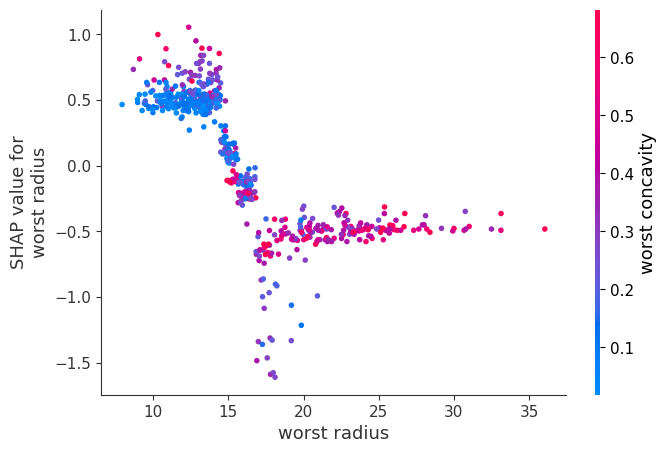

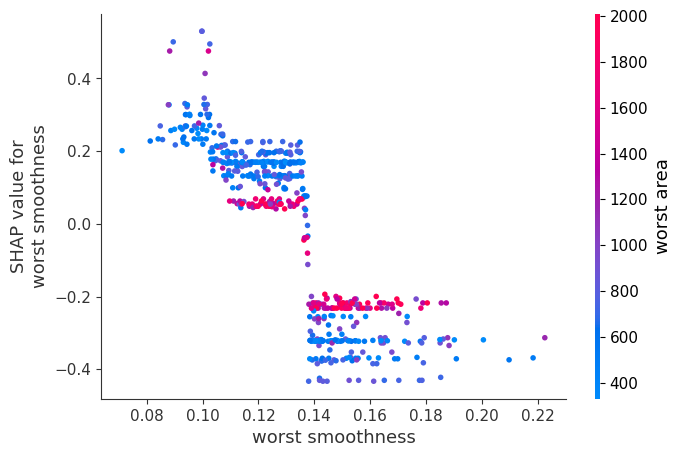

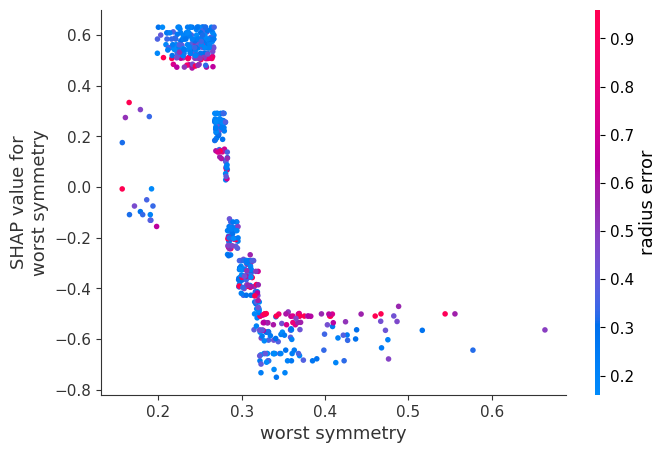

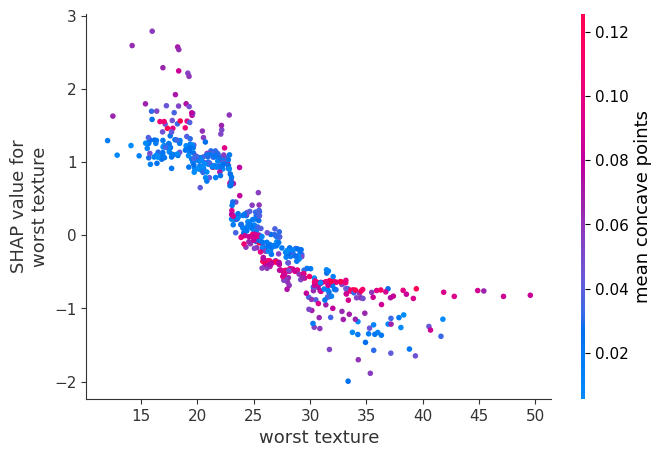

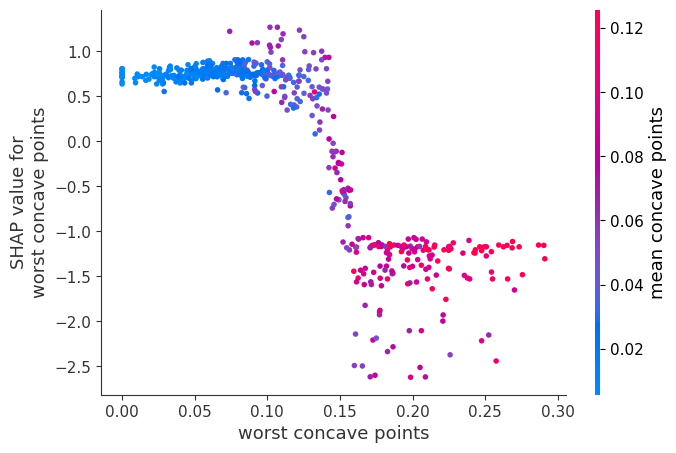

In [ ]:
# Generate multiple dependence plots
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X)
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

## SHAP - Force plots (não é necessário fazer esses)

> Adicionar aspas



In [ ]:
# Generate force plot - Multiple rows
shap.force_plot(explainer.expected_value, shap_values[:100,:], X.iloc[:100,:])

In [ ]:
# Generate force plot - Single
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

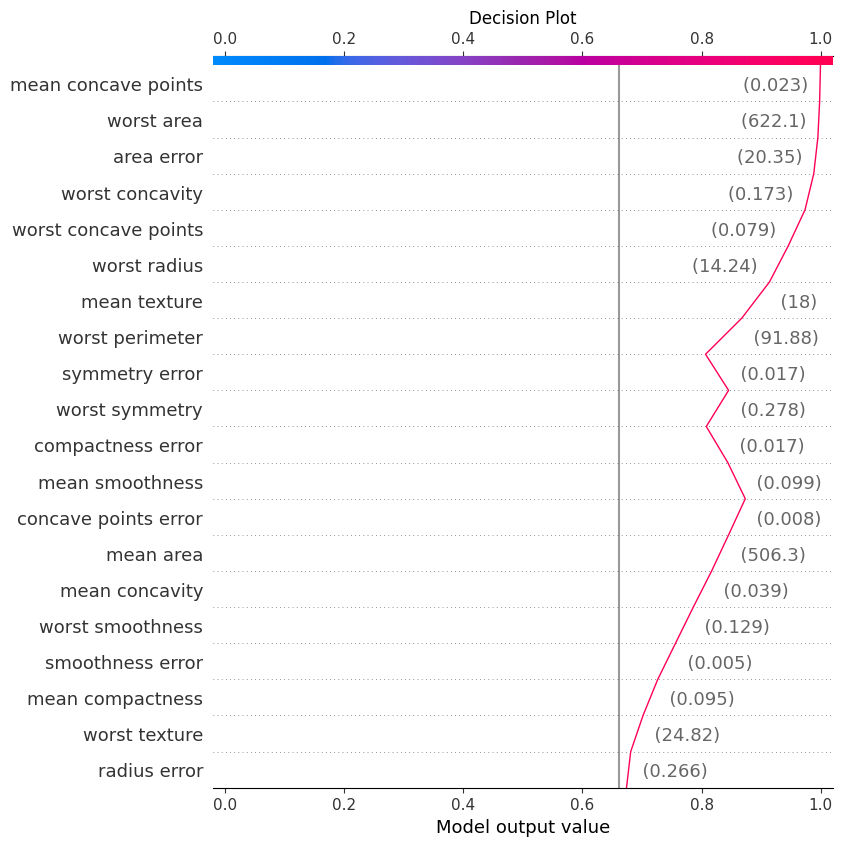

In [ ]:
# Generate Decision plot
shap.decision_plot(expected_value, shap_values[79],
                   link='logit' ,features=X.loc[79,:],
                   feature_names=(X.columns.tolist()),
                   show=True,title="Decision Plot")

---

#Push the limits of explainability — an ultimate guide to SHAP library

https://medium.com/swlh/push-the-limits-of-explainability-an-ultimate-guide-to-shap-library-a110af566a02